In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from utils import data_visualizer
from utils import data_analyser
import matplotlib.pyplot as plt


# Import Data

In [4]:
df = pd.read_csv("data/Foam Rheometer Data for ML.csv")
data_analysis = data_analyser(df)

# Exploratory Data Analysis

In [5]:
data_analysis.categorical_analysis()

,Categories,Counts,Frequency,Null Count
Gas,"[CO2, N2]","[318, 43]","[0.88, 0.12]",0
Surfactant,"[Armovis EHS + TTM, TTM, Ethomeen C12, Ethoduo...","[75, 70, 54, 54, 45, 36, 27]","[0.21, 0.19, 0.15, 0.15, 0.12, 0.1, 0.07]",0
Concentration,"[1%, 2%]","[343, 18]","[0.95, 0.05]",0
Water Type,"[PW, DI, SW, FW]","[136, 81, 81, 63]","[0.38, 0.22, 0.22, 0.17]",0
Chelating Agent,"[15%, 0%, 0]","[244, 99, 18]","[0.68, 0.27, 0.05]",0
Corrosion Inhibitor,"[0.00%, 1.50%, 0.0%, 0%]","[273, 79, 8, 1]","[0.76, 0.22, 0.02, 0.0]",0


In [6]:
data_analysis.continuous_analysis()

,Mean,Std,Kurtosis,Skewness,Max,Min,Null count
Pressure,1063.71,244.58,10.93,3.59,2000.00,1000.00,0
Temperature,245.15,42.70,-1.75,0.51,300.00,212.00,0
Shear Rate,1001.39,623.39,-1.26,0.09,2000.00,100.00,0
Foam Quality,71.99,2.29,0.18,0.70,80.61,67.89,0
Viscosity,17.48,9.33,6.44,1.84,75.70,3.47,0


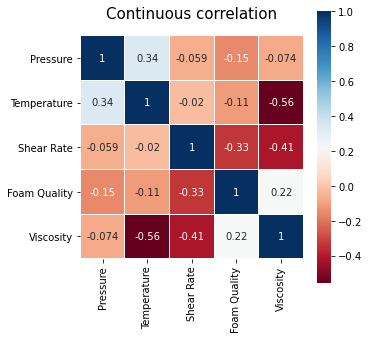

In [7]:
data_analysis.continuous_correlation(figsize=(5,5))

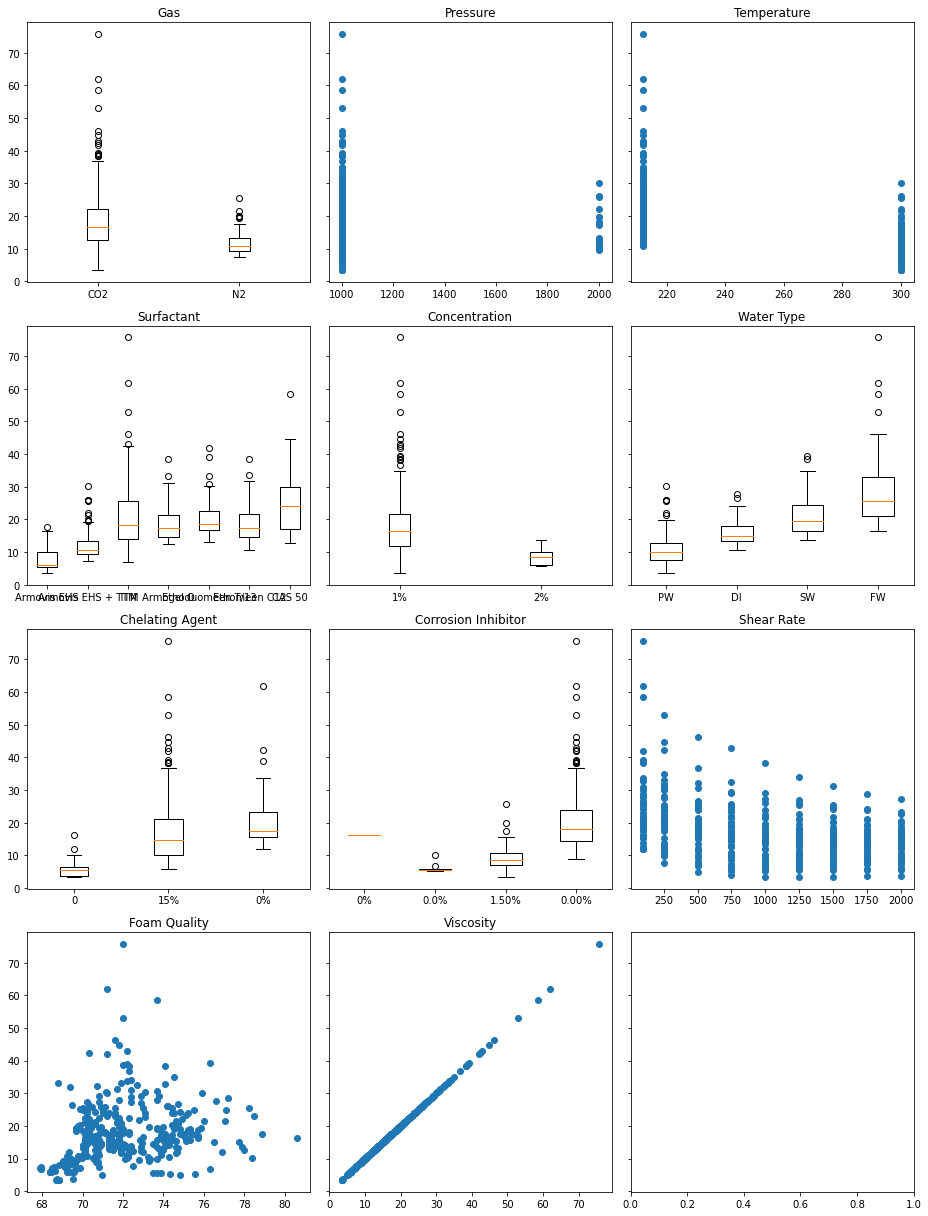

In [8]:
data_visual = data_visualizer(df)
data_visual.all_feature_plots(dependent = "Viscosity", shape = (4,3), figsize = (13,17))

# Preprocessing 

In [9]:
def remove_pc(string):
    if isinstance(string, str):
        string = string.replace('%', '')
        return float(string)

In [10]:
df2 = pd.get_dummies(df, columns=["Gas", "Surfactant", "Water Type"], prefix=["Gas", "Surfactant", "Water"], drop_first = False)

df2['Concentration']=df2['Concentration'].apply(remove_pc)
df2['Corrosion Inhibitor']=df2['Corrosion Inhibitor'].apply(remove_pc)
df2['Chelating Agent']=df2['Chelating Agent'].apply(remove_pc)

df2 = df2.astype("float")

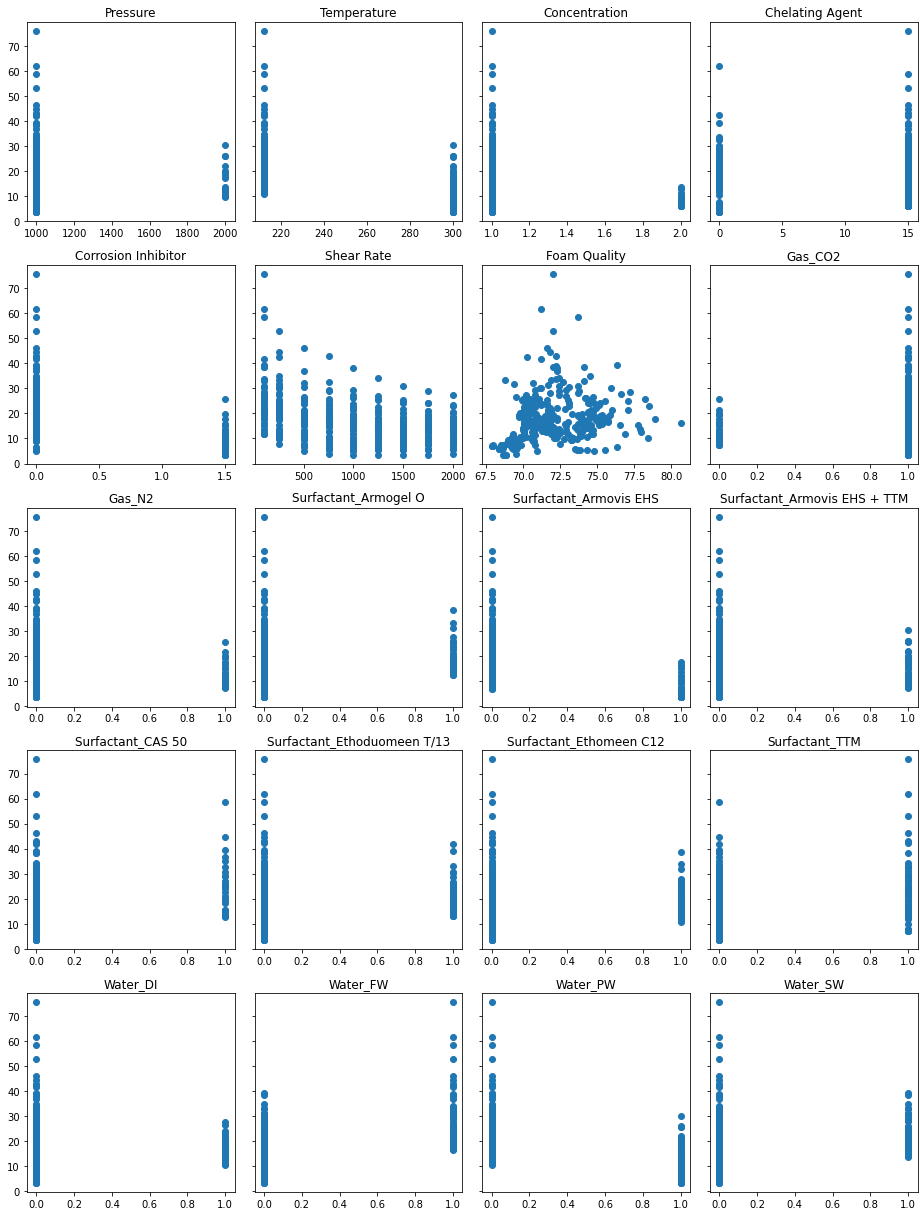

In [11]:
data_visual = data_visualizer(df2)
data_visual.all_feature_plots(dependent = "Viscosity", remove = ["Viscosity"], shape = (5,4), figsize = (13,17))

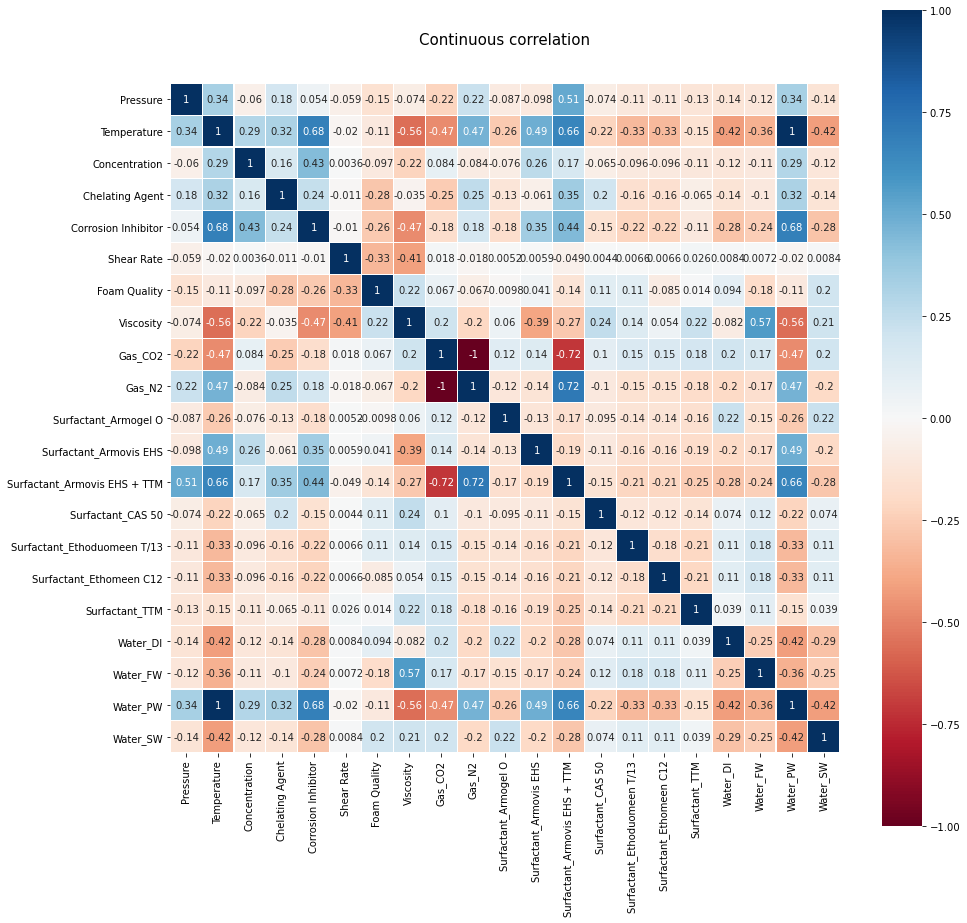

In [12]:
data_analysis = data_analyser(df2)
data_analysis.continuous_correlation(figsize=(15,15))

# ANN - Model1
## 1 hidden layer with 25 units, no regularization, standardization of inputs

In [13]:
y = df2['Viscosity'].values
X = df2.loc[:, df2.columns!='Viscosity'].values

In [14]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, shuffle = True)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [16]:
inputs = tf.keras.Input(shape=(20,))
x = tf.keras.layers.Dense(25, input_shape=(20,1), name='dense_layer1', kernel_initializer='normal',
                            activation = 'sigmoid')(inputs)
outputs = tf.keras.layers.Dense(1, input_shape=(20,1), name='output_layer', kernel_initializer='normal',
                            activation = 'linear')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs, name="ANN")
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = [tf.keras.metrics.RootMeanSquaredError(
    name='root_mean_squared_error', dtype=None)])
print(model.summary())

Model: "ANN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 20)]              0         
_________________________________________________________________
dense_layer1 (Dense)         (None, 25)                525       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 26        
Total params: 551
Trainable params: 551
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
history = model.fit(X_train, y_train, epochs = 7000, validation_data=(scaler.transform(X_test), y_test))

Epoch 1/7000
9/9 [==============================] - 1s 28ms/step - loss: 394.4468 - root_mean_squared_error: 19.8569 - val_loss: 375.1980 - val_root_mean_squared_error: 19.3700
Epoch 2/7000
9/9 [==============================] - 0s 5ms/step - loss: 367.4625 - root_mean_squared_error: 19.1605 - val_loss: 370.6141 - val_root_mean_squared_error: 19.2513
Epoch 3/7000
9/9 [==============================] - 0s 5ms/step - loss: 366.6496 - root_mean_squared_error: 19.1443 - val_loss: 365.9772 - val_root_mean_squared_error: 19.1305
Epoch 4/7000
9/9 [==============================] - 0s 5ms/step - loss: 375.8163 - root_mean_squared_error: 19.3819 - val_loss: 361.2584 - val_root_mean_squared_error: 19.0068
Epoch 5/7000
9/9 [==============================] - 0s 4ms/step - loss: 366.2415 - root_mean_squared_error: 19.1331 - val_loss: 356.4680 - val_root_mean_squared_error: 18.8804
Epoch 6/7000
9/9 [==============================] - 0s 5ms/step - loss: 406.6670 - root_mean_squared_error: 20.0848 - v

Train R2 score: 0.9962224306108642
Trained MSE score: 0.3446277379989624
Test R2 score: 0.9433125262934949
Test MSE: 3.901820659637451


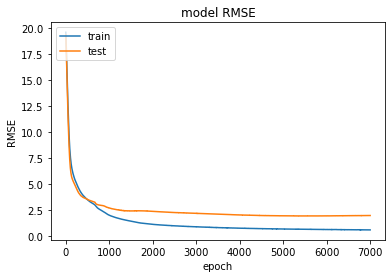

In [20]:
preds = model.predict(X_train)
print(f'Train R2 score: {r2_score(y_train, preds)}')
print(f'Trained MSE score: {mean_squared_error(y_train, preds)}')
preds = model.predict(scaler.transform(X_test))
print(f'Test R2 score: {r2_score(y_test, preds)}')
print(f'Test MSE: {mean_squared_error(y_test, preds)}')

plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model RMSE')
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ANN - Model2
## 2 hidden layers (25 and 12 units), dropout regularization and standardized inputs.

In [21]:
inputs = tf.keras.Input(shape=(20,))
x = tf.keras.layers.Dense(25, input_shape=(20,1), name='dense_layer1', kernel_initializer='normal',
                            activation = 'relu')(inputs)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(12, name='dense_layer2', kernel_initializer='normal',
                            activation = 'relu')(x)
x = tf.keras.layers.Dropout(0.1)(x)
outputs = tf.keras.layers.Dense(1, input_shape=(20,1), name='output_layer', kernel_initializer='normal',
                            activation = 'linear')(x)

model2 = tf.keras.Model(inputs=inputs, outputs=outputs, name="Deeper_ANN")

model2.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = [tf.keras.metrics.RootMeanSquaredError(
    name='root_mean_squared_error', dtype=None)])

model2.summary()

Model: "Deeper_ANN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 20)]              0         
_________________________________________________________________
dense_layer1 (Dense)         (None, 25)                525       
_________________________________________________________________
dropout (Dropout)            (None, 25)                0         
_________________________________________________________________
dense_layer2 (Dense)         (None, 12)                312       
_________________________________________________________________
dropout_1 (Dropout)          (None, 12)                0         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 13        
Total params: 850
Trainable params: 850
Non-trainable params: 0
__________________________________________________________

In [22]:
history2 = model2.fit(X_train, y_train, epochs = 7000, validation_data=(scaler.transform(X_test), y_test))

Epoch 1/7000
9/9 [==============================] - 1s 23ms/step - loss: 444.9391 - root_mean_squared_error: 21.0562 - val_loss: 385.8757 - val_root_mean_squared_error: 19.6437
Epoch 2/7000
9/9 [==============================] - 0s 6ms/step - loss: 385.8650 - root_mean_squared_error: 19.6411 - val_loss: 384.7598 - val_root_mean_squared_error: 19.6153
Epoch 3/7000
9/9 [==============================] - 0s 6ms/step - loss: 391.4778 - root_mean_squared_error: 19.7736 - val_loss: 383.0567 - val_root_mean_squared_error: 19.5718
Epoch 4/7000
9/9 [==============================] - 0s 8ms/step - loss: 361.2585 - root_mean_squared_error: 18.9996 - val_loss: 380.3897 - val_root_mean_squared_error: 19.5036
Epoch 5/7000
9/9 [==============================] - 0s 8ms/step - loss: 355.4022 - root_mean_squared_error: 18.8427 - val_loss: 376.1725 - val_root_mean_squared_error: 19.3952
Epoch 6/7000
9/9 [==============================] - 0s 7ms/step - loss: 352.6820 - root_mean_squared_error: 18.7498 - v

0.9883443851825977
1.0633420944213867
0.8750322592152966
8.601577758789062


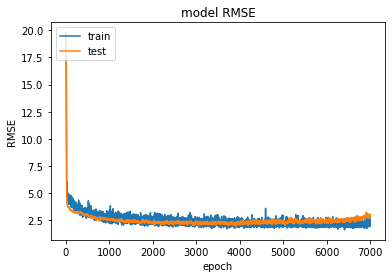

In [23]:
preds = model2.predict(X_train)
print(f'{r2_score(y_train, preds)}')
print(f'{mean_squared_error(y_train, preds)}')
preds = model2.predict(scaler.transform(X_test))
print(f'{r2_score(y_test, preds)}')
print(f'{mean_squared_error(y_test, preds)}')

plt.plot(history2.history['root_mean_squared_error'])
plt.plot(history2.history['val_root_mean_squared_error'])
plt.title('model RMSE')
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()